# How cleanly are different spectral categories separated in the WHAV* diagram? Can we come up with clean dividing lines that can be used for reliable spectral classification based only on the H$\alpha$ EW and $\sigma_{\rm gas} - \sigma_*$?
---
Like Lisa suggested: given a set of boundaries in the WHAV* diagram, what % of BPT-classified star-forming spaxels lie within those boundaries, etc.? 

In here:
1. Recreate Fig. 15 from the paper draft, but with each spectral classification shown separately (classification based on *total* emission line fluxes)
2. Repeat the above, but with the emission line fluxes from *individual components*. Idea: put all 3 components in 1 diagram to make larger samples. 

In [1]:
%matplotlib widget

In [227]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist

from spaxelsleuth.loaddata.lzifu import load_lzifu_galaxies
from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn
from spaxelsleuth.plotting.plottools import bpt_colours, bpt_labels, bpt_ticks
from spaxelsleuth.plotting.plottools import morph_labels, morph_ticks
from spaxelsleuth.plotting.plottools import ncomponents_labels, ncomponents_colours
from spaxelsleuth.plotting.plottools import component_labels, component_colours
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours, plot2dscatter, plot2dcontours

import matplotlib
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 14})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [228]:
# Options
fig_path = "/priv/meggs3/u5708159/SAMI/figs/full_sample/"
savefigs = False
bin_type = "default"    # Options: "default" or "adaptive" for Voronoi binning
ncomponents = "recom"   # Options: "1" or "recom"
eline_SNR_min = 3       # Minimum S/N of emission lines to accept


In [4]:
# Load the sample
df = load_sami_galaxies(ncomponents=ncomponents,
                        bin_type=bin_type,
                        eline_SNR_min=eline_SNR_min, 
                        vgrad_cut=False,
                        correct_extinction=False,
                        sigma_gas_SNR_cut=True)

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc,

In [229]:
# Load the LZIFU galaxies
df_lzifu = load_lzifu_galaxies(ncomponents=ncomponents,
                              bin_type=bin_type,
                              eline_SNR_min=eline_SNR_min, 
                              vgrad_cut=False,
                              correct_extinction=False,
                              sigma_gas_SNR_cut=True)        


Loading LZIFU DataFrame for all galaxies in the LZIFU subsample...


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [6]:
df_lzifu["HALPHA continuum luminosity"].min()

0.0

In [7]:
# Plot settings
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"
nbins = 100

# Spectral categories
cats = ["SF", "Composite", "Seyfert", "LINER", "Ambiguous", "Not classified"]


## Classification based on *total* fluxes: WHAV* diagrams
---

In [8]:
###############################################################################
# WHAV diagram (hist) - spectral classification (all together)
###############################################################################
col_z = "BPT (numeric) (total)"

# Create figure
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

# recom components
for ii in range(3):
    plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                          col_y=f"{col_y} (component {ii})",
                          col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df else col_z,
                          alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                          linewidths=0.5,
                          contours=True, hist=True, colors="white",
                          plot_colorbar=True if ii == 3 - 1 else False)
    # Decorations
    axs[ii].grid()
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None
    axs[ii].set_title(component_labels[ii])
        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
###############################################################################
# WHAV diagram (hist) - spectral classification (individually)
###############################################################################
for cat in cats:
    df_subset = df.loc[df["BPT (total)"] == cat]
    
    # Create figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df_subset, 
                           col_x=f"{col_x} (component {ii})",
                           col_y=f"{col_y} (component {ii})",
                           # col_z="log SFR surface density (component 0)", log_z=False,
                           # col_z="log N2 (total)", log_z=False,
                           # vmin=-0.4 - 0.6, vmax=-0.4 + 0.6, cmap="coolwarm",
                           # col_z="count", log_z=True,
                           col_z=f"log HALPHA luminosity (component {ii})", vmax=40,
                           # col_z=f"log HALPHA continuum luminosity", vmax=39,
                           alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                           linewidths=0.5,
                           contours=True, hist=True, colors="white",
                           plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_title(component_labels[ii])
        fig.suptitle(cat)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/u5708159/python/Modules/spaxelsleuth/plotting/plotgalaxies.py:177: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Classification based on *individual* fluxes: WHAV* diagrams
---

In [10]:
###############################################################################
# WHAV diagram (hist) - LZIFU - spectral classification
###############################################################################
col_z = "BPT (numeric)"

# Create figure
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

# recom components
for ii in range(3):
    plot2dhistcontours(df_lzifu, col_x=f"{col_x} (component {ii})",
                          col_y=f"{col_y} (component {ii})",
                          col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df_lzifu else col_z,
                          alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                          linewidths=0.5,
                          contours=True, hist=True, colors="white",
                          plot_colorbar=True if ii == 3 - 1 else False)
    
    # Decorations
    axs[ii].grid()
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None
    axs[ii].set_title(component_labels[ii])
        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
###############################################################################
# WHAV diagram (hist) - LZIFU - spectral classification (individually)
###############################################################################

for cat in cats:
    
    # Create figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        df_subset = df_lzifu.loc[df_lzifu[f"BPT (component {ii})"] == cat]
        if df_subset.shape[0] > 0:
            plot2dhistcontours(df_subset, 
                               col_x=f"{col_x} (component {ii})",
                               col_y=f"{col_y} (component {ii})",
                               col_z="count", log_z=True,
                               alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                               linewidths=0.5,
                               contours=True, hist=True, colors="white",
                               plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            axs[ii].grid()
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_title(component_labels[ii])
            fig.suptitle(cat)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Making a monster DataFrame containing the *individual* fluxes from our LZIFU fits plus the single-component spaxels from SAMI 
---

In [12]:
#//////////////////////////////////////////////////////////////////////////////
# 1-component spaxels from SAMI
df_1comp = df[df["Number of components"] == 1]

# Need to rename the BPT classifcation from "total" to "component 0" to be consistent with the labelling in the LZIFU DataFrame
df_1comp = df_1comp.rename(columns={
    "BPT (total)": "BPT (component 0)",
    "BPT (numeric) (total)": "BPT (numeric) (component 0)",
    "log N2 (total)": "log N2 (component 0)"
})

# Drop bad rows
df_1comp.loc[:, "Good?"] = ~df_1comp[f"{col_x} (component 0)"].isna() & ~df_1comp[f"{col_y} (component 0)"].isna()
cond = df_1comp["Good?"] == 1.0
df_1comp = df_1comp[cond]


In [13]:
#//////////////////////////////////////////////////////////////////////////////
# Make a copy of the LZIFU data frame where the fluxes/classifications for 
# all components are stored in "component 0"
df_lzifu_comp0 = None
for ii in [0, 1, 2]:
    df_this_component = df_lzifu[~df_lzifu[f"sigma_gas - sigma_* (component {ii})"].isna()]
    # print(df_this_component[print_cols])
    
    # Drop all columns that are NOT this component
    other_components = [cc for cc in [0, 1, 2] if cc != ii]
    cols_to_drop = [c for c in df_this_component.columns if f"(total)" in c]
    for cc in other_components:
        cols_to_drop += [c for c in df_this_component.columns if f"(component {cc})" in c]
    df_this_component = df_this_component.drop(columns=cols_to_drop)
    print("---------------------------------------------------")
    print(df_this_component[f"sigma_gas - sigma_* (component {ii})"])

    # Rename columns to have suffix "component 0"
    if ii != 0:
        cols_to_rename = [c for c in df_this_component.columns if c.endswith(f"(component {ii})")]
        new_col_names = [c.split(f"(component {ii})")[0] + "(component 0)" for c in cols_to_rename]
        rename_dict = dict(zip(cols_to_rename, new_col_names))
        df_this_component = df_this_component.rename(columns=rename_dict)
    print("---------------------------------------------------")
    print(df_this_component[f"sigma_gas - sigma_* (component 0)"])

    # Merge 
    if df_lzifu_comp0 is None:
        df_lzifu_comp0 = df_this_component.copy()
    else:
        df_lzifu_comp0 = df_lzifu_comp0.append(df_this_component)
    print("---------------------------------------------------")
    print(df_lzifu_comp0[f"sigma_gas - sigma_* (component 0)"])

# Drop bad rows
df_lzifu_comp0.loc[:, "Good?"] = ~df_lzifu_comp0[f"{col_x} (component 0)"].isna() & ~df_lzifu_comp0[f"{col_y} (component 0)"].isna()
cond = df_lzifu_comp0["Good?"] == 1.0
df_lzifu_comp0 = df_lzifu_comp0[cond]

---------------------------------------------------
141       -39.987221
169       -51.355183
1081      -93.161389
1171      -39.273698
1522      -56.981917
             ...    
100562   -124.450676
100609   -115.587561
100708    -95.485535
100506    -77.352871
100952   -123.300015
Name: sigma_gas - sigma_* (component 0), Length: 109654, dtype: float64
---------------------------------------------------
141       -39.987221
169       -51.355183
1081      -93.161389
1171      -39.273698
1522      -56.981917
             ...    
100562   -124.450676
100609   -115.587561
100708    -95.485535
100506    -77.352871
100952   -123.300015
Name: sigma_gas - sigma_* (component 0), Length: 109654, dtype: float64
---------------------------------------------------
141       -39.987221
169       -51.355183
1081      -93.161389
1171      -39.273698
1522      -56.981917
             ...    
100562   -124.450676
100609   -115.587561
100708    -95.485535
100506    -77.352871
100952   -123.300015
Name: s

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


---------------------------------------------------
2977       58.876383
3482       17.498658
3528       12.418621
3530       23.455108
3582      -22.431918
             ...    
100562    159.349249
100609    178.208913
100708    212.162910
100506    296.309544
100952     26.502418
Name: sigma_gas - sigma_* (component 2), Length: 2184, dtype: float64
---------------------------------------------------
2977       58.876383
3482       17.498658
3528       12.418621
3530       23.455108
3582      -22.431918
             ...    
100562    159.349249
100609    178.208913
100708    212.162910
100506    296.309544
100952     26.502418
Name: sigma_gas - sigma_* (component 0), Length: 2184, dtype: float64
---------------------------------------------------
141       -39.987221
169       -51.355183
1081      -93.161389
1171      -39.273698
1522      -56.981917
             ...    
100562    159.349249
100609    178.208913
100708    212.162910
100506    296.309544
100952     26.502418
Name: sigma

In [14]:
#//////////////////////////////////////////////////////////////////////////////
# Merge 
# Need to avoid double-counting spaxels... 
# Find common galaxies and remove these from the SAMI 1-comp data frame 
lzifu_galaxies = df_lzifu_comp0.catid.unique()
sami_galaxies = df_1comp.catid.unique()
common_galaxies = [g for g in lzifu_galaxies if g in sami_galaxies]
lzifu_only_galaxies = [g for g in lzifu_galaxies if g not in sami_galaxies]

# Remove the common galaxies from the SAMI data frame
rows_to_drop = df_1comp.catid.isin(common_galaxies)
df_1comp_dropped = df_1comp.drop(rows_to_drop[rows_to_drop].index)

# Check
# assert len([g for g in gals_1comp_only if g in lzifu_galaxies]) == 0,\
#     "ERROR: there are galaxies in the 1-component SAMI data set that are also in the LZIFU data set!"
assert np.all(df_lzifu_comp0["Good?"].values),\
    "ERROR: there are 'bad' rows in df_lzifu_comp0!"
assert np.all(df_1comp_dropped["Good?"].values),\
    "ERROR: there are 'bad' rows in df_lzifu_comp0!"

# Now, merge 
df_1comp_dropped["Source"] = "SAMI data set (1-comp only)"
df_lzifu_comp0["Source"] = "LZIFU fits (multi-comp)"
df_merged = df_lzifu_comp0.append(df_1comp_dropped)


In [15]:
# Check! 
cond = df_merged["catid"] == 491956
cond &= df_merged["x (projected, arcsec)"] == 12
cond &= df_merged["y (projected, arcsec)"] == 12
df_merged[cond]["sigma_gas (component 0)"]

417     27.698055
417     38.059116
417    137.994431
Name: sigma_gas (component 0), dtype: float64

In [16]:
cond = df_lzifu["catid"] == 491956
cond &= df_lzifu["x (projected, arcsec)"] == 12
cond &= df_lzifu["y (projected, arcsec)"] == 12
df_lzifu[cond][["sigma_gas (component 0)","sigma_gas (component 1)","sigma_gas (component 2)"]]

,sigma_gas (component 0),sigma_gas (component 1),sigma_gas (component 2)
417,27.698055,38.059116,137.994431


In [18]:
plt.close("all")

In [187]:
###############################################################################
# WHAV diagram (hist) - spectral classification (individually), all shown on 
# the SAME diagram
###############################################################################
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"

rc("font",**{"family": "serif", "size": 8})
nbins = 100
fig, axs = plt.subplots(nrows=1, ncols=len(cats), figsize=(3 * len(cats), 3))
# plt.tight_layout()
fig.subplots_adjust(wspace=0.3)

axs = [axs]
for cc, cat in enumerate(cats):
    # for rr, (df_this, name) in enumerate(zip([df_1comp_dropped, df_lzifu_comp0, df_merged,],
                                 # ["SAMI 1-component spaxels only", "LZIFU indivudual components", "SAMI 1-comp. spaxels + LZIFU ind. components"])):
    for rr, (df_this, name) in enumerate(zip([df_lzifu_comp0], ["LZIFU indivudual components"])):
        # Create figure
        ax = axs[rr][cc]
        bbox = ax.get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, bbox.width / 10, bbox.height])
       
        # Plot: 
        df_subset = df_this.loc[df_this[f"BPT (component 0)"] == cat]
        N = df_subset.shape[0]
        if N > 0:
            plot2dhistcontours(df_subset, 
                               col_x=f"{col_x} (component 0)",
                               col_y=f"{col_y} (component 0)",
                               # col_z="r/R_e", log_z=False,
                               # col_z="log HALPHA luminosity (component 0)", vmax=39,
                               col_z=f"log N2 (component 0)", vmin=-0.3 - 0.6, vmax=-0.3 + 0.6, cmap="coolwarm",
                               # col_z="log HALPHA EW (total)",
                               alpha=1.0, ax=ax, cax=cax, nbins=nbins,
                               linewidths=0.5, 
                               contours=True, hist=True, colors="white",
                               plot_colorbar=True)
            
        # Decorations
        ax.grid()
        ax.text(s=f"{cat} (N = {N:d})", x=0.1, y=0.9, verticalalignment="top", transform=ax.transAxes)
        axs[rr][0].set_title(name)
        
# plt.tight_layout()

# revert font size
rc("font",**{"family": "serif", "size": 14})

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [123]:
plt.close("all")

In [23]:
# Histograms showing Halpha EW as a function of spectral category
cat_colours = {
    "Not classified":  np.array([128/256, 128/256, 128/256, 1]),
    "SF":  np.array([0/256, 0/256, 256/256,1]),
    "Composite":  np.array([0/256, 255/256,188/256, 1]),
    "LINER":  np.array([256/256, 100/256, 0/256, 1])  ,
    "Seyfert":  np.array([256/256, 239/256, 0/256, 1])  ,
    "Ambiguous": np.array([256/256, 100/256, 256/256, 1])
}

for col in ["log HALPHA EW", "sigma_gas - sigma_*"]:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    for cat in cats:
        df_cat = df_lzifu_comp0[df_lzifu_comp0["BPT (component 0)"] == cat]
        ax.hist(df_cat[f"{col} (component 0)"], range=(vmin_fn(col), vmax_fn(col)), bins=100, histtype="step", color=cat_colours[cat], label=cat, normed=True)
    ax.set_xlabel(label_fn(col))
    ax.set_ylabel(r"$N$ (normalised)")
    ax.grid()
    ax.legend()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Picking out the weirdos
--- 
* What are the galaxies with the highest EWs in the LINER subset? **There are a couple that are bona-fide LLAGN with only minimal evidence for outflows (9388000001 and 9008500002), one with bona-fide merger-induced shocks (517278) and one that appears to be SF-bulge mixing but with LINER ratios for some reason.**
* What are the Seyferts? 

In [24]:
# Moderate-high EWs but with delta_sigma < 0
df_liners = df_lzifu_comp0[(df_lzifu_comp0["HALPHA EW (component 0)"] > 3) & (df_lzifu_comp0["BPT (component 0)"] == "LINER") & (df_lzifu_comp0["sigma_gas - sigma_* (component 0)"] < -100)]
df_liners["catid"].unique()

array([    618992,     517278, 9388000001, 9008500002])

In [25]:
### Moderate-high EWs but with delta_sigma > 0
df_liners = df_lzifu_comp0[(df_lzifu_comp0["HALPHA EW (component 0)"] > 3) & (df_lzifu_comp0["BPT (component 0)"] == "LINER") & (df_lzifu_comp0["sigma_gas - sigma_* (component 0)"] > 0)]
df_liners["catid"].unique()

array([    209698,     560407,     422446,      91926,     567445,
            47460,     492883,      56181,     618992,     106549,
            65406,     550781,     663440,     491887,     105738,
           396833, 9011900147, 9239900178, 9388000197, 9388000200,
       9403800881, 9016800216,      16926,     460378,     185365,
       9016800276, 9388000046, 9008500107, 9008500074, 9011900166,
           548946,      30346,     396607,     323329,     209807])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

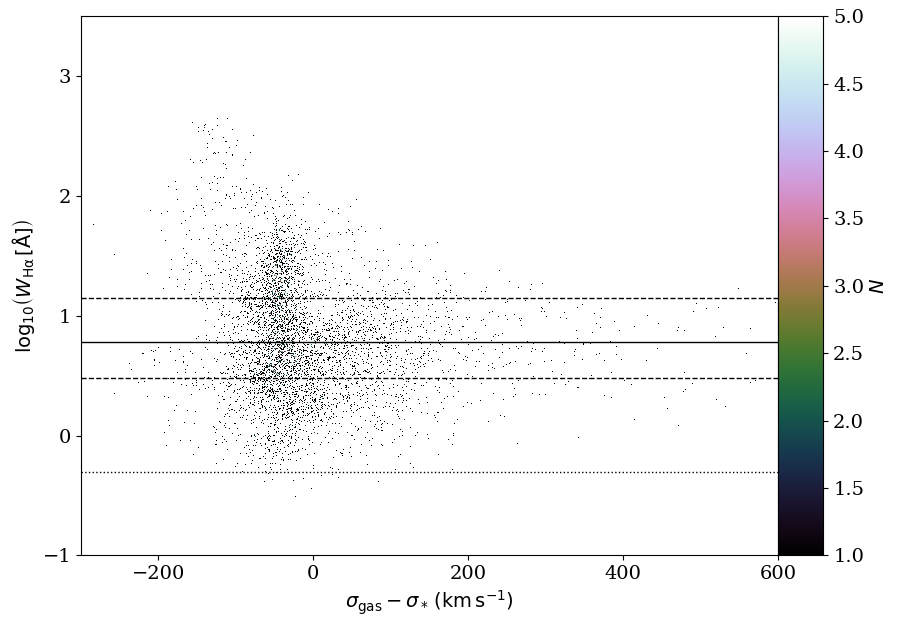

In [26]:
# seyferts: pick those with >3 Seyfert-like components
df_seyferts = df_lzifu_comp0[df_lzifu_comp0["BPT (component 0)"] == "Seyfert"]
seyfert_gals = df_seyferts.catid.unique()
good_gals = []
for gal in seyfert_gals:
    df_gal = df_seyferts[df_seyferts["catid"] == gal]
    if df_gal[df_gal["BPT (component 0)"] == "Seyfert"].shape[0] > 5:
        good_gals.append(gal)
df_gals_with_seyfert_spaxels = df_lzifu_comp0[df_lzifu_comp0.catid.isin(good_gals)]

# WHAV* diagram made only of galaxies with >5 Seyfert components
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"
plot2dhistcontours(df_gals_with_seyfert_spaxels, 
                   col_x=f"{col_x} (component 0)",
                   col_y=f"{col_y} (component 0)",
                   col_z="count",
                   alpha=1.0, nbins=1000,
                   linewidths=0.5, 
                   contours=True, hist=True, colors="white",
                   plot_colorbar=True)



In [27]:
# Galaxies with large numbers of components in the ??? region
df_unknown = df_lzifu_comp0[(df_lzifu_comp0["sigma_gas - sigma_* (component 0)"] > 100) & (df_lzifu_comp0["HALPHA EW (component 0)"] < 3)]
unknown_gals = df_unknown.catid.unique()
good_gals = []
for gal in unknown_gals:
    df_gal = df_unknown[df_unknown["catid"] == gal]
    if df_gal[(df_gal["sigma_gas - sigma_* (component 0)"] > 100) & (df_gal["HALPHA EW (component 0)"] < 3)].shape[0] > 10:
        good_gals.append(gal)
good_gals.sort()
good_gals


[7841,
 8703,
 9062,
 14552,
 16317,
 30346,
 30916,
 31620,
 31912,
 32362,
 39057,
 47674,
 63305,
 64553,
 69740,
 70532,
 77452,
 84900,
 91545,
 93803,
 98097,
 99349,
 106549,
 106638,
 106717,
 107137,
 136232,
 137838,
 144402,
 178190,
 184648,
 204799,
 209698,
 209807,
 210660,
 220396,
 227264,
 229163,
 229167,
 252021,
 273336,
 279905,
 279932,
 287824,
 288982,
 289089,
 289096,
 289097,
 289197,
 296677,
 298591,
 298666,
 319070,
 321059,
 346894,
 371633,
 377666,
 396833,
 418725,
 422443,
 423784,
 460378,
 487027,
 491887,
 492690,
 508132,
 517278,
 537365,
 544749,
 544958,
 545903,
 549070,
 560238,
 561020,
 572402,
 594049,
 599838,
 622787,
 663440,
 9008500062,
 9008500120,
 9011900001,
 9011900002,
 9011900006,
 9011900024,
 9011900030,
 9011900051,
 9011900057,
 9011900073,
 9011900074,
 9011900084,
 9011900125,
 9011900137,
 9011900138,
 9011900166,
 9011900247,
 9011900413,
 9011900492,
 9011900500,
 9016800001,
 9016800014,
 9016800024,
 9016800039,
 9

## Try creating classification rules
---

In [28]:
delta_sigma_bound = 0
halpha_ew_upper_bound = 14
halpha_ew_lower_bound = 3

# Only include classified spaxels for now
df_classified = df_merged[df_merged["BPT (component 0)"] != "Not classified"]

# Which DataFrame to use for these calculations
df_to_use = df_lzifu_comp0

In [29]:
print("-------------------------------------------------------")
print("KINEMATICALLY COLD BOUNDARY")
print(f"sigma_gas - sigma_* < {delta_sigma_bound:.0f} km s^-1")
print("-------------------------------------------------------")

# What % of SF-components are within these bounds?
for cat in cats:
    cond_cat = df_to_use["BPT (component 0)"] == cat
    cond_cat_in_bounds = cond_cat & (df_to_use["sigma_gas - sigma_* (component 0)"] <= delta_sigma_bound)
    frac_in_bounds = df_to_use[cond_cat_in_bounds].shape[0] / df_to_use[cond_cat].shape[0] * 100
    print(f"{frac_in_bounds:.2f}% of all {cat} components are within these bounds")
print("-------------------------------------------------------")


-------------------------------------------------------
KINEMATICALLY COLD BOUNDARY
sigma_gas - sigma_* < 0 km s^-1
-------------------------------------------------------
95.11% of all SF components are within these bounds
89.39% of all Composite components are within these bounds
44.16% of all Seyfert components are within these bounds
78.36% of all LINER components are within these bounds
83.65% of all Ambiguous components are within these bounds
64.53% of all Not classified components are within these bounds
-------------------------------------------------------


In [30]:
print("-------------------------------------------------------")
print("KINEMATICALLY HOT BOUNDARY")
print(f"sigma_gas - sigma_* > {delta_sigma_bound:.0f} km s^-1")
print("-------------------------------------------------------")

# What % of SF-components are within these bounds?
for cat in cats:
    cond_cat = df_to_use["BPT (component 0)"] == cat
    cond_cat_in_bounds = cond_cat & (df_to_use["sigma_gas - sigma_* (component 0)"] > delta_sigma_bound)
    frac_in_bounds = df_to_use[cond_cat_in_bounds].shape[0] / df_to_use[cond_cat].shape[0] * 100
    print(f"{frac_in_bounds:.2f}% of all {cat} components are within these bounds")
print("-------------------------------------------------------")


-------------------------------------------------------
KINEMATICALLY HOT BOUNDARY
sigma_gas - sigma_* > 0 km s^-1
-------------------------------------------------------
4.89% of all SF components are within these bounds
10.61% of all Composite components are within these bounds
55.84% of all Seyfert components are within these bounds
21.64% of all LINER components are within these bounds
16.35% of all Ambiguous components are within these bounds
35.47% of all Not classified components are within these bounds
-------------------------------------------------------


In [31]:
print("-------------------------------------------------------")
print("STAR-FORMING BOUNDARY")
print(f"sigma_gas - sigma_* < {delta_sigma_bound:.0f} km s^-1")
print(f"EW(Ha) > {halpha_ew_upper_bound:.0f} Å")
print("-------------------------------------------------------")

# What % of SF-components are within these bounds?
for cat in cats:
    cond_cat = df_to_use["BPT (component 0)"] == cat
    cond_cat_in_bounds = cond_cat & (df_to_use["sigma_gas - sigma_* (component 0)"] <= delta_sigma_bound)
    cond_cat_in_bounds &= df_to_use["HALPHA EW (component 0)"] >= halpha_ew_upper_bound
    frac_in_bounds = df_to_use[cond_cat_in_bounds].shape[0] / df_to_use[cond_cat].shape[0] * 100
    print(f"{frac_in_bounds:.2f}% of all {cat} components are within these bounds")
print("-------------------------------------------------------")


-------------------------------------------------------
STAR-FORMING BOUNDARY
sigma_gas - sigma_* < 0 km s^-1
EW(Ha) > 14 Å
-------------------------------------------------------
69.72% of all SF components are within these bounds
15.88% of all Composite components are within these bounds
7.86% of all Seyfert components are within these bounds
0.00% of all LINER components are within these bounds
15.11% of all Ambiguous components are within these bounds
6.78% of all Not classified components are within these bounds
-------------------------------------------------------


In [32]:
print("-------------------------------------------------------")
print("COMPOSITE BOUNDARY")
print(f"sigma_gas - sigma_* < {delta_sigma_bound:.0f} km s^-1")
print(f"{halpha_ew_lower_bound:.0f} Å < EW(Ha) < {halpha_ew_upper_bound:.0f} Å")
print("-------------------------------------------------------")

# What % of components in different categories are within these bounds?
for cat in cats:
    cond_cat = df_to_use["BPT (component 0)"] == cat
    cond_cat_in_bounds = cond_cat & (df_to_use["sigma_gas - sigma_* (component 0)"] <= delta_sigma_bound)
    cond_cat_in_bounds &= df_to_use["HALPHA EW (component 0)"] < halpha_ew_upper_bound
    cond_cat_in_bounds &= df_to_use["HALPHA EW (component 0)"] >= halpha_ew_lower_bound
    frac_in_bounds = df_to_use[cond_cat_in_bounds].shape[0] / df_to_use[cond_cat].shape[0] * 100
    print(f"{frac_in_bounds:.2f}% of all {cat} components are within these bounds")
print("-------------------------------------------------------")


-------------------------------------------------------
COMPOSITE BOUNDARY
sigma_gas - sigma_* < 0 km s^-1
3 Å < EW(Ha) < 14 Å
-------------------------------------------------------
25.31% of all SF components are within these bounds
67.62% of all Composite components are within these bounds
26.23% of all Seyfert components are within these bounds
16.29% of all LINER components are within these bounds
47.76% of all Ambiguous components are within these bounds
26.72% of all Not classified components are within these bounds
-------------------------------------------------------


In [33]:
print("-------------------------------------------------------")
print("LINER BOUNDARY")
print(f"sigma_gas - sigma_* < {delta_sigma_bound:.0f} km s^-1")
print(f"EW(Ha) < {halpha_ew_lower_bound:.0f} Å")
print("-------------------------------------------------------")

# What % of components in different categories are within these bounds?
for cat in cats:
    cond_cat = df_to_use["BPT (component 0)"] == cat
    cond_cat_in_bounds = cond_cat & (df_to_use["sigma_gas - sigma_* (component 0)"] <= delta_sigma_bound)
    cond_cat_in_bounds &= df_to_use["HALPHA EW (component 0)"] < halpha_ew_lower_bound
    frac_in_bounds = df_to_use[cond_cat_in_bounds].shape[0] / df_to_use[cond_cat].shape[0] * 100
    print(f"{frac_in_bounds:.2f}% of all {cat} components are within these bounds")
print("-------------------------------------------------------")


-------------------------------------------------------
LINER BOUNDARY
sigma_gas - sigma_* < 0 km s^-1
EW(Ha) < 3 Å
-------------------------------------------------------
0.08% of all SF components are within these bounds
5.89% of all Composite components are within these bounds
10.07% of all Seyfert components are within these bounds
62.07% of all LINER components are within these bounds
20.78% of all Ambiguous components are within these bounds
31.04% of all Not classified components are within these bounds
-------------------------------------------------------


In [34]:
print("-------------------------------------------------------")
print("SEYFERT/SHOCK BOUNDARY")
print(f"sigma_gas - sigma_* > {delta_sigma_bound:.0f} km s^-1")
print(f"EW(Ha) > {halpha_ew_upper_bound:.0f} Å")
print("-------------------------------------------------------")

# What % of components in different categories are within these bounds?
for cat in cats:
    cond_cat = df_to_use["BPT (component 0)"] == cat
    cond_cat_in_bounds = cond_cat & (df_to_use["sigma_gas - sigma_* (component 0)"] > delta_sigma_bound)
    cond_cat_in_bounds &= df_to_use["HALPHA EW (component 0)"] > halpha_ew_upper_bound
    frac_in_bounds = df_to_use[cond_cat_in_bounds].shape[0] / df_to_use[cond_cat].shape[0] * 100
    print(f"{frac_in_bounds:.2f}% of all {cat} components are within these bounds")
print("-------------------------------------------------------")


-------------------------------------------------------
SEYFERT/SHOCK BOUNDARY
sigma_gas - sigma_* > 0 km s^-1
EW(Ha) > 14 Å
-------------------------------------------------------
3.46% of all SF components are within these bounds
2.81% of all Composite components are within these bounds
13.45% of all Seyfert components are within these bounds
0.03% of all LINER components are within these bounds
4.13% of all Ambiguous components are within these bounds
0.99% of all Not classified components are within these bounds
-------------------------------------------------------


In [35]:
print("-------------------------------------------------------")
print("SEYFERT/SHOCK BOUNDARY")
print(f"sigma_gas - sigma_* > {delta_sigma_bound:.0f} km s^-1")
print(f"EW(Ha) > {halpha_ew_lower_bound:.0f} Å")
print("-------------------------------------------------------")

# What % of components in different categories are within these bounds?
for cat in cats:
    cond_cat = df_to_use["BPT (component 0)"] == cat
    cond_cat_in_bounds = cond_cat & (df_to_use["sigma_gas - sigma_* (component 0)"] > delta_sigma_bound)
    cond_cat_in_bounds &= df_to_use["HALPHA EW (component 0)"] > halpha_ew_lower_bound
    frac_in_bounds = df_to_use[cond_cat_in_bounds].shape[0] / df_to_use[cond_cat].shape[0] * 100
    print(f"{frac_in_bounds:.2f}% of all {cat} components are within these bounds")
print("-------------------------------------------------------")


-------------------------------------------------------
SEYFERT/SHOCK BOUNDARY
sigma_gas - sigma_* > 0 km s^-1
EW(Ha) > 3 Å
-------------------------------------------------------
4.89% of all SF components are within these bounds
10.30% of all Composite components are within these bounds
52.52% of all Seyfert components are within these bounds
6.70% of all LINER components are within these bounds
13.60% of all Ambiguous components are within these bounds
13.89% of all Not classified components are within these bounds
-------------------------------------------------------


In [36]:
print("-------------------------------------------------------")
print("??? BOUNDARY")
print(f"sigma_gas - sigma_* > {delta_sigma_bound:.0f} km s^-1")
print(f"EW(Ha) < {halpha_ew_lower_bound:.0f} Å")
print("-------------------------------------------------------")

# What % of components in different categories are within these bounds?
for cat in cats:
    cond_cat = df_to_use["BPT (component 0)"] == cat
    cond_cat_in_bounds = cond_cat & (df_to_use["sigma_gas - sigma_* (component 0)"] > delta_sigma_bound)
    cond_cat_in_bounds &= df_to_use["HALPHA EW (component 0)"] < halpha_ew_lower_bound
    frac_in_bounds = df_to_use[cond_cat_in_bounds].shape[0] / df_to_use[cond_cat].shape[0] * 100
    print(f"{frac_in_bounds:.2f}% of all {cat} components are within these bounds")
print("-------------------------------------------------------")


-------------------------------------------------------
??? BOUNDARY
sigma_gas - sigma_* > 0 km s^-1
EW(Ha) < 3 Å
-------------------------------------------------------
0.00% of all SF components are within these bounds
0.32% of all Composite components are within these bounds
3.32% of all Seyfert components are within these bounds
14.94% of all LINER components are within these bounds
2.75% of all Ambiguous components are within these bounds
21.58% of all Not classified components are within these bounds
-------------------------------------------------------


# What drives changes in EW? 
---
* If EW is constant as a function of L(Ha), then that implies that L(Ha)/F(C) ~ const., which implies that the ionisation source is stellar. If not, then there is something else going on!

In [37]:
# Pick a galaxy dominated by HOLMES. If we plot EW vs. L(Ha) then the relationship should be roughly constant.
gal = 185224

In [38]:
# Pick a galaxy dominated by SF. If we plot EW vs. L(Ha) then the relationship should be roughly constant.
gal = 92676


In [39]:
# Pick a galaxy with a SF-induced wind. How does the EW behave as a function of L(Ha)? Are the 2nd, 3rd components tied to the stellar continuum or not?
gal = 106717


In [40]:
# Pick a Seyfert galaxy. How does the EW behave as a function of L(Ha)? Are the 2nd, 3rd components tied to the stellar continuum or not?
gal = 209698


In [41]:
# Merger
gal = 618992


In [49]:
df_gal = df_lzifu[df_lzifu["catid"] == gal]
col_y = "log HALPHA EW"
col_z = "Number of components"
markers = ["o", ">", "D"]
from matplotlib.lines import Line2D


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.subplots_adjust(wspace=0.5)

for cc, col_x in enumerate(["log HALPHA luminosity", "log HALPHA continuum luminosity"]):
    ax = axs[cc]
    bbox = ax.get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])

    # Plot full SAMI sample
    plot2dhistcontours(df=df, 
                       col_x=col_x,
                       col_y=col_y,
                       col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r", ax=ax,
                       plot_colorbar=False)

    # Plot the S7 data
    for ii in range(3):
        plot2dscatter(df=df_gal,
                      col_x=f"{col_x} (component {ii})" if f"{col_x} (component {ii})" in df_gal else col_x,
                      col_y=f"{col_y} (component {ii})",
                      col_z=None if col_z == "Number of components" else col_z,
                      marker=markers[ii], ax=ax, cax=cax,
                      markersize=20, markerfacecolor=component_colours[ii] if col_z == "Number of components" else None, 
                      markeredgecolor="black",
                      plot_colorbar=True if ii == 2 else False)

    # Decorations
    ax.grid()

    # # Axis limits
    # ax.set_xlim(
    #     [np.nanmin([vmin_fn(f"{col_x}"),
    #                 df_gal[f"{col_x} (component 0)"].min(), 
    #                 df_gal[f"{col_x} (component 1)"].min(), 
    #                 df_gal[f"{col_x} (component 2)"].min()]) - 0.1,
    #      np.nanmax([vmax_fn(f"{col_x}"), 
    #                 df_gal[f"{col_x} (component 0)"].max(),
    #                 df_gal[f"{col_x} (component 1)"].max(),
    #                 df_gal[f"{col_x} (component 2)"].max()]) + 0.1])
    # ax.set_ylim(
    #     [np.nanmin([vmin_fn(f"{col_y}"),
    #                 df_gal[f"{col_y} (component 0)"].min(), 
    #                 df_gal[f"{col_y} (component 1)"].min(), 
    #                 df_gal[f"{col_y} (component 2)"].min()]) - 0.1,
    #      np.nanmax([vmax_fn(f"{col_y}"), 
    #                 df_gal[f"{col_y} (component 0)"].max(),
    #                 df_gal[f"{col_y} (component 1)"].max(),
    #                 df_gal[f"{col_y} (component 2)"].max()]) + 0.1])

    # Legend
    legend_elements = [Line2D([0], [0], marker=markers[ii], 
                       color="none", markeredgecolor="black",
                       label=f"Component {ii + 1}",
                       markerfacecolor=component_colours[ii] if col_z == "Number of components" else "white", markersize=5) for ii in range(3)]
    ax.legend(handles=legend_elements, fontsize="x-small", loc="upper right")
    ax.set_title(f"GAMA{gal}")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
plt.close("all")

In [44]:
###############################################################################
# WHAV diagram (hist) - spectral classification (individually), all shown on 
# the SAME diagram
###############################################################################
col_x = "log HALPHA luminosity"
col_y = "log HALPHA EW"
rc("font",**{"family": "serif", "size": 8})
nbins = 100
fig, axs = plt.subplots(nrows=3, ncols=len(cats), figsize=(3 * len(cats), 3 * 3))
# plt.tight_layout()
fig.subplots_adjust(wspace=0.3)

for cc, cat in enumerate(cats):
    for rr, (df_this, name) in enumerate(zip([df_1comp_dropped, df_lzifu_comp0, df_merged,],
                                 ["SAMI 1-component spaxels only", "LZIFU indivudual components", "SAMI 1-comp. spaxels + LZIFU ind. components"])):
        # Create figure
        ax = axs[rr][cc]
        bbox = ax.get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, bbox.width / 10, bbox.height])
       
        # Plot: 
        df_subset = df_this.loc[df_this[f"BPT (component 0)"] == cat]
        N = df_subset.shape[0]
        if N > 0:
            plot2dhistcontours(df_subset, 
                               col_x=f"{col_x} (component 0)",
                               col_y=f"{col_y} (component 0)",
                               col_z="log HALPHA continuum luminosity", log_z=False,
#                                col_z="log HALPHA luminosity (component 0)", vmax=39,
                               # vmin=-0.4 - 0.6, vmax=-0.4 + 0.6, cmap="coolwarm",
                               alpha=1.0, ax=ax, cax=cax, nbins=nbins,
                               linewidths=0.5, 
                               contours=True, hist=True, colors="white",
                               plot_colorbar=True)
            
        # Decorations
        ax.grid()
        ax.text(s=f"{cat} (N = {N:d})", x=0.1, y=0.9, verticalalignment="top", transform=ax.transAxes)
        axs[rr][0].set_title(name)
        
# plt.tight_layout()

# revert font size
rc("font",**{"family": "serif", "size": 14})

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Ho+2016: winds in edge-on galaxies
---
What do the wind components look like in the WHAV* diagram?

Wind-dominated galaxies: 543769 93167 24433 567624 574200 228432 239249 31452 238125 106616 486834 417678 106389 593680 618906

Non wind-dominated galaxies: 31509 558861 302994 16294 511789 517594 289429 204876 376379 184237 185510 595027 218681 85474 381159 301201 594986 623679 297667 228066 325536 496966 348116 376293 543859

Of the 4 wind galaxies in the sample of Ho+2016, we detect a significant (i.e. more than a few components' worth) low-EW, high-$\Delta\sigma$ tail in 2/4 of these galaxies, whereas in the non-wind sample we do not detect a significant tail in any. 
This further suggests that this region of the diagram may be used to identify winds driven by star formation. However, as our diagram requires a reliable measurement of $\sigma_*$, it is often not possible to measure $\Delta\sigma$ off the plane in edge-on systems. 

In [45]:
gals_wind = [543769, 93167, 24433, 567624, 574200, 228432, 239249, 31452, 238125, 106616, 486834, 417678, 106389, 593680, 618906]
gals_nowind = [31509, 558861, 302994, 16294, 511789, 517594, 289429, 204876, 376379, 184237, 185510, 595027, 218681, 85474, 381159, 301201, 594986, 623679, 297667, 228066, 325536, 496966, 348116, 376293, 543859]

lzifu_gals_wind = [g for g in gals_wind if g in df_lzifu_comp0.catid.unique()]
lzifu_gals_nowind = [g for g in gals_nowind if g in df_lzifu_comp0.catid.unique()]

print(lzifu_gals_wind)
print(lzifu_gals_nowind)

[239249, 31452, 106616, 618906]
[185510, 218681, 85474, 325536]


## What are the differences between spaxels located in star-forming regions w/ winds and spaxels powered by AGN?
---
* What are the EW ratios between successive componets like?


In [78]:
# Spaxels where the 1st component is SF-like 
df_seyfert_comp1 = df_lzifu[df_lzifu["BPT (component 0)"] == "Seyfert"]

# Spaxels where the 1st component is Seyfert-like 
df_SF_comp1 = df_lzifu[df_lzifu["BPT (component 0)"] == "SF"]

# Spaxels where the 1st component is Composite-like 
df_comp_comp1 = df_lzifu[df_lzifu["BPT (component 0)"] == "Composite"]


In [79]:
# WHAV* diagrams for the 2 subsets
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"
col_z = "Number of components"
markers = ["o", ">", "D"]
from matplotlib.lines import Line2D

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.subplots_adjust(wspace=0.5)

for cc, df_this in enumerate([df_SF_comp1, df_seyfert_comp1]):
    ax = axs[cc]
    bbox = ax.get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])

    # Plot full SAMI sample
    plot2dhistcontours(df=df, 
                       col_x=col_x,
                       col_y=col_y,
                       col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r", ax=ax,
                       plot_colorbar=False)

    # Plot the S7 data
    for ii in range(1):
        plot2dscatter(df=df_this,
                      col_x=f"{col_x} (component {ii})" if f"{col_x} (component {ii})" in df_gal else col_x,
                      col_y=f"{col_y} (component {ii})",
                      col_z="Number of components",
                      marker=markers[ii], ax=ax, cax=cax,
                      markersize=20, markerfacecolor=component_colours[ii] if col_z == "Number of components" else None, 
                      markeredgecolor="black",
                      plot_colorbar=True if ii == 2 else False)


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
df_seyfert_comp1["Delta HALPHA EW (0/1)"]

## Incorporating the *total* N2 ratio into our classification system
---
In Fig. x, we show the distributions in the N2 ratio of individual emission line components taken from our high-S/N LZIFU subset, shown separately for different spectral categories. 
Interestingly, the distributions in the SF, Seyfert and LINER categories are very cleanly separated in log N2, with essentially all SF-like components having log N2 < -0.3 and all Seyfert and LINER components having log N2 > -0.3. 
This value is markedly higher than the optimal SF/AGN dividing criterion of Cid Fernandes et al. (2011), who found the optimal value to be -0.4 using fluxes from aperture spectra taken from SDSS. Indeed, by plotting the different spectral categories on the WHAN diagram separately, we see that a significant fraction of SF-like components have log N2 > -0.4, which would classify them as AGN using the demarcation lines on the original WHAN diagram. 

In [90]:
plt.close("all")

In [128]:
# Histogram: EW of 1st component - EW of 2nd component 
from astropy.visualization import hist

col = "log N2 (component 0)"
# First, plot the N2 ratios of individual components 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5))
for cat in cats:
    df_cat_ind = df_lzifu_comp0[df_lzifu_comp0["BPT (component 0)"] == cat]
    hist(df_cat_ind[f"{col}"], ax=ax, range=(vmin_fn(col), vmax_fn(col)), bins="scott", histtype="step", color=cat_colours[cat], label=cat, normed=True)
    ax.set_xlabel(label_fn(col))
    ax.set_ylabel(r"$N$ (normalised)")
    ax.grid()
    ax.legend()
ax.set_title("Classification of individual emission line components")
ax.set_xlabel("log N2 (individual components)")
ax.grid()
ax.set_ylabel(r"$N$ (normalised)")


# Then, plot the *total* N2 ratios to show that we can cleanly separate the categories even if we don't have N2 for every individual component
col = "log N2 (total)"
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for cat in cats:
    df_cat_comp1 = df_lzifu[df_lzifu["BPT (component 0)"] == cat]
    df_cat_tot = df_lzifu[df_lzifu["BPT (total)"] == cat]
    hist(df_cat_comp1[f"{col}"], ax=axs[0], range=(vmin_fn(col), vmax_fn(col)), bins="scott", histtype="step", color=cat_colours[cat], label=cat, normed=True)
    hist(df_cat_tot[f"{col}"], ax=axs[1], range=(vmin_fn(col), vmax_fn(col)), bins="scott", histtype="step", color=cat_colours[cat], label=cat, normed=True)
    ax.set_xlabel(label_fn(col))
    ax.set_ylabel(r"$N$ (normalised)")
    ax.grid()
    ax.legend()
axs[0].set_title("Classification based on component 1 flux only")
axs[1].set_title("Classification based on total flux")
[ax.set_xlabel("log N2 (total)") for ax in axs]
[ax.grid() for ax in axs]
[ax.set_ylabel(r"$N$ (normalised)")]






Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/astropy/visualization/hist.py:72: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  return ax.hist(x, bins, **kwargs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[Text(0, 0.5, '$N$ (normalised)')]

A classification system for spaxels and components:
* If the total EW in the spaxels is less than 3\,Å: then evolved stars are the only plausible ionisation mechanism. Otherwise, for each component,
* If $EW > 14\,\rm Å$ and $\Delta\sigma < 0$ and $\rm N2 < -0.3$: star-forming region.
* If $EW > 14\,\rm Å$ and $\Delta\sigma > 0$ and $\rm N2 > -0.3$: AGN
* If $3\,\rm Å < EW < 14\,\rm Å$ and $\Delta\sigma < 0$ and $\rm N2 < -0.4$: "mixing" region between star formation and evolved stars.
* If $EW < 3\,\rm Å$ and $\Delta \sigma < 0$: evolved stars or LLAGN.
* If $EW < 3\,\rm Å$ and $\Delta \sigma > 0$: evolved stars, shocks or LLAGN.

In [160]:
##########################################################################
# Based on individual components
##########################################################################
# SF: Any spaxels with log N2 (in any component) < -0.35: what are the classificaionts of these?
cond = df_lzifu_comp0["log N2 (component 0)"] < -0.35
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu_comp0[(df_lzifu_comp0["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu_comp0["BPT (component 0)"] == cat)
    N = df_lzifu_comp0[cond_cat].shape[0]
    
    print(f"{cat} individual components: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) have log N2 < -0.35")

print("-------------------------------------------------------------------------------------------")
# Mixing: Any spaxels with -0.35 < log N2 (in any component) < -0.15: what are the classificaionts of these?
cond = df_lzifu_comp0["log N2 (component 0)"] >= -0.35
cond &= df_lzifu_comp0["log N2 (component 0)"] < -0.15
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu_comp0[(df_lzifu_comp0["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu_comp0["BPT (component 0)"] == cat)
    N = df_lzifu_comp0[cond_cat].shape[0]
    
    print(f"{cat} individual components: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) have -0.35 < log N2 < -0.15")
    
print("-------------------------------------------------------------------------------------------")
# AGN/shocks/HOLMES: Any spaxels with log N2 (in any component) > -0.15: what are the classificaionts of these?
cond = df_lzifu_comp0["log N2 (component 0)"] >= -0.15
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu_comp0[(df_lzifu_comp0["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu_comp0["BPT (component 0)"] == cat)
    N = df_lzifu_comp0[cond_cat].shape[0]
    
    print(f"{cat} individual components: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) have log N2 > -0.15")

SF individual components: 90.47500311681836% (N = 29028 of 32084) have log N2 < -0.35
Composite individual components: 13.963317384370017% (N = 1751 of 12540) have log N2 < -0.35
Seyfert individual components: 6.388206388206388% (N = 104 of 1628) have log N2 < -0.35
LINER individual components: 0.0% (N = 0 of 3193) have log N2 < -0.35
Ambiguous individual components: 46.84295736643281% (N = 1736 of 3706) have log N2 < -0.35
Not classified individual components: 22.219552599299437% (N = 17571 of 79079) have log N2 < -0.35
-------------------------------------------------------------------------------------------
SF individual components: 9.524996883181648% (N = 3056 of 32084) have -0.35 < log N2 < -0.15
Composite individual components: 79.50558213716108% (N = 9970 of 12540) have -0.35 < log N2 < -0.15
Seyfert individual components: 15.294840294840295% (N = 249 of 1628) have -0.35 < log N2 < -0.15
LINER individual components: 2.5994362668336986% (N = 83 of 3193) have -0.35 < log N2 < -0.

In [161]:
##########################################################################
# Based on total fluxes
##########################################################################
# SF: Any spaxels with log N2 (in any component) < -0.35: what are the classificaionts of these?
cond = df_lzifu["log N2 (total)"] < -0.35
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu[(df_lzifu["BPT (total)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu["BPT (total)"] == cat)
    N = df_lzifu[cond_cat].shape[0]
    
    print(f"{cat} total fluxes: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) have log N2 < -0.35")

print("-------------------------------------------------------------------------------------------")
# Mixing: Any spaxels with -0.35 < log N2 (in any component) < -0.15: what are the classificaionts of these?
cond = df_lzifu["log N2 (total)"] >= -0.35
cond &= df_lzifu["log N2 (total)"] < -0.15
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu[(df_lzifu["BPT (total)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu["BPT (total)"] == cat)
    N = df_lzifu[cond_cat].shape[0]
    
    print(f"{cat} total fluxes: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) have -0.35 < log N2 < -0.15")
    
print("-------------------------------------------------------------------------------------------")
# AGN/shocks/HOLMES: Any spaxels with log N2 (in any component) > -0.15: what are the classificaionts of these?
cond = df_lzifu["log N2 (total)"] >= -0.15
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu[(df_lzifu["BPT (total)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu["BPT (total)"] == cat)
    N = df_lzifu[cond_cat].shape[0]
    
    print(f"{cat} total fluxes: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) have log N2 > -0.15")

SF total fluxes: 91.59617181384309% (N = 36273 of 39601) have log N2 < -0.35
Composite total fluxes: 16.171639748152202% (N = 2363 of 14612) have log N2 < -0.35
Seyfert total fluxes: 3.90625% (N = 90 of 2304) have log N2 < -0.35
LINER total fluxes: 0.0% (N = 0 of 3938) have log N2 < -0.35
Ambiguous total fluxes: 60.20126602824217% (N = 3709 of 6161) have log N2 < -0.35
Not classified total fluxes: 4.0321732249610065% (N = 17631 of 437258) have log N2 < -0.35
-------------------------------------------------------------------------------------------
SF total fluxes: 8.358374788515443% (N = 3310 of 39601) have -0.35 < log N2 < -0.15
Composite total fluxes: 77.42266630166986% (N = 11313 of 14612) have -0.35 < log N2 < -0.15
Seyfert total fluxes: 13.49826388888889% (N = 311 of 2304) have -0.35 < log N2 < -0.15
LINER total fluxes: 3.072625698324022% (N = 121 of 3938) have -0.35 < log N2 < -0.15
Ambiguous total fluxes: 22.60996591462425% (N = 1393 of 6161) have -0.35 < log N2 < -0.15
Not cla

In [150]:
# SF: Any spaxels with log N2 (in any component) < -0.35: what are the classificaionts of these?
cond = df_lzifu_comp0["log N2 (component 0)"] < -0.35
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu_comp0[(df_lzifu_comp0["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu_comp0["BPT (component 0)"] == cat)
    N = df_lzifu_comp0[cond_cat].shape[0]
    
    print(f"{cat} individual components: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) have log N2 < -0.35")

SF spaxels: 90.47500311681836% (N = 29028 of 32084) have log N2 (total) < -0.35
Composite spaxels: 13.963317384370017% (N = 1751 of 12540) have log N2 (total) < -0.35
Seyfert spaxels: 6.388206388206388% (N = 104 of 1628) have log N2 (total) < -0.35
LINER spaxels: 0.0% (N = 0 of 3193) have log N2 (total) < -0.35
Ambiguous spaxels: 46.84295736643281% (N = 1736 of 3706) have log N2 (total) < -0.35
Not classified spaxels: 22.219552599299437% (N = 17571 of 79079) have log N2 (total) < -0.35


In [154]:
# SF: Any spaxels with log N2 (in any component) > -0.15: what are the classificaionts of these?
cond = df_lzifu_comp0["log N2 (component 0)"] >= -0.15
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu_comp0[(df_lzifu_comp0["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu_comp0["BPT (component 0)"] == cat)
    N = df_lzifu_comp0[cond_cat].shape[0]
    
    print(f"{cat} individual components: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) have log N2 > -0.15")

SF individual components: 0.0% (N = 0 of 32084) have log N2 > -0.15
Composite individual components: 6.5311004784689% (N = 819 of 12540) have log N2 > -0.15
Seyfert individual components: 78.31695331695332% (N = 1275 of 1628) have log N2 > -0.15
LINER individual components: 97.40056373316631% (N = 3110 of 3193) have log N2 > -0.15
Ambiguous individual components: 21.883432271991367% (N = 811 of 3706) have log N2 > -0.15
Not classified individual components: 23.179352293276345% (N = 18330 of 79079) have log N2 > -0.15


In [ ]:
IDEA: use the N2 to classify 

In [138]:
# SF: 1-component spaxels with EW > 14Å AND delta_sigma < 0 AND log N2 (total) < -0.35: what are the classificaionts of these?
cond = df_lzifu["Number of components"] == 1
cond &= df_lzifu["HALPHA EW (component 0)"] > 14
cond &= df_lzifu["sigma_gas - sigma_* (component 0)"] < 0
cond &= df_lzifu["log N2 (total)"] < -0.35
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu[(df_lzifu["Number of components"] == 1) & (df_lzifu["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu["BPT (component 0)"] == cat)
    N = df_lzifu[cond_cat].shape[0]
    
    print(f"1-component {cat} spaxels: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) are in the upper-left corner with log N2 (total) < -0.35")

1-component SF spaxels: 47.16518768796644% (N = 12703 of 26933) are in the upper-left corner with log N2 (total) < -0.35
1-component Composite spaxels: 4.816868126874488% (N = 530 of 11003) are in the upper-left corner with log N2 (total) < -0.35
1-component Seyfert spaxels: 0.0% (N = 0 of 646) are in the upper-left corner with log N2 (total) < -0.35
1-component LINER spaxels: 0.0% (N = 0 of 2821) are in the upper-left corner with log N2 (total) < -0.35
1-component Ambiguous spaxels: 6.992187499999999% (N = 358 of 5120) are in the upper-left corner with log N2 (total) < -0.35
1-component Not classified spaxels: 1.161120279238742% (N = 978 of 84229) are in the upper-left corner with log N2 (total) < -0.35


In [141]:
# Composite: 1-component spaxels with EW > 14Å AND delta_sigma < 0 AND -0.35 < log N2 (total) < -0.15: what are the classificaionts of these?
cond = df_lzifu["Number of components"] == 1
cond &= df_lzifu["HALPHA EW (component 0)"] > 14
cond &= df_lzifu["sigma_gas - sigma_* (component 0)"] < 0
cond &= df_lzifu["log N2 (total)"] >= -0.35
cond &= df_lzifu["log N2 (total)"] < -0.15
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu[(df_lzifu["Number of components"] == 1) & (df_lzifu["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu["BPT (component 0)"] == cat)
    N = df_lzifu[cond_cat].shape[0]
    
    print(f"1-component {cat} spaxels: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) are in the upper-left corner with -0.35 < log N2 (total) < -0.15")

1-component SF spaxels: 3.4010321909924626% (N = 916 of 26933) are in the upper-left corner with -0.35 < log N2 (total) < -0.15
1-component Composite spaxels: 7.725165863855313% (N = 850 of 11003) are in the upper-left corner with -0.35 < log N2 (total) < -0.15
1-component Seyfert spaxels: 0.30959752321981426% (N = 2 of 646) are in the upper-left corner with -0.35 < log N2 (total) < -0.15
1-component LINER spaxels: 0.0% (N = 0 of 2821) are in the upper-left corner with -0.35 < log N2 (total) < -0.15
1-component Ambiguous spaxels: 0.078125% (N = 4 of 5120) are in the upper-left corner with -0.35 < log N2 (total) < -0.15
1-component Not classified spaxels: 0.28137577318975654% (N = 237 of 84229) are in the upper-left corner with -0.35 < log N2 (total) < -0.15


In [142]:
# AGN/shock: 1-component spaxels with EW > 14Å AND delta_sigma < 0 AND log N2 (total) > -0.15: what are the classificaionts of these?
cond = df_lzifu["Number of components"] == 1
cond &= df_lzifu["HALPHA EW (component 0)"] > 14
cond &= df_lzifu["sigma_gas - sigma_* (component 0)"] < 0
cond &= df_lzifu["log N2 (total)"] >= -0.15
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu[(df_lzifu["Number of components"] == 1) & (df_lzifu["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu["BPT (component 0)"] == cat)
    N = df_lzifu[cond_cat].shape[0]
    
    print(f"1-component {cat} spaxels: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) are in the upper-left corner with log N2 (total) > -0.15")

1-component SF spaxels: 0.0% (N = 0 of 26933) are in the upper-left corner with log N2 (total) > -0.15
1-component Composite spaxels: 0.0999727347087158% (N = 11 of 11003) are in the upper-left corner with log N2 (total) > -0.15
1-component Seyfert spaxels: 1.08359133126935% (N = 7 of 646) are in the upper-left corner with log N2 (total) > -0.15
1-component LINER spaxels: 0.0% (N = 0 of 2821) are in the upper-left corner with log N2 (total) > -0.15
1-component Ambiguous spaxels: 0.0390625% (N = 2 of 5120) are in the upper-left corner with log N2 (total) > -0.15
1-component Not classified spaxels: 0.0035617186479716015% (N = 3 of 84229) are in the upper-left corner with log N2 (total) > -0.15


In [134]:
# 1-component spaxels with 3Å < EW < 14Å and delta_sigma < 0: what are the classificaionts of these?
cond = df_lzifu["Number of components"] == 1
cond &= df_lzifu["HALPHA EW (component 0)"] <= 14
cond &= df_lzifu["HALPHA EW (component 0)"] > 3
cond &= df_lzifu["sigma_gas - sigma_* (component 0)"] < 0
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu[(df_lzifu["Number of components"] == 1) & (df_lzifu["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu["BPT (component 0)"] == cat)
    N = df_lzifu[cond_cat].shape[0]
    
    print(f"1-component {cat} spaxels: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) are in the middle-left quadrant")

1-component SF spaxels: 22.596814317008874% (N = 6086 of 26933) are in the middle-left quadrant
1-component Composite spaxels: 62.31027901481414% (N = 6856 of 11003) are in the middle-left quadrant
1-component Seyfert spaxels: 24.613003095975234% (N = 159 of 646) are in the middle-left quadrant
1-component LINER spaxels: 14.711095356256646% (N = 415 of 2821) are in the middle-left quadrant
1-component Ambiguous spaxels: 31.25% (N = 1600 of 5120) are in the middle-left quadrant
1-component Not classified spaxels: 14.708710776573389% (N = 12389 of 84229) are in the middle-left quadrant


In [135]:
# >1-component spaxels with EW(1) > 14Å and delta_sigma(1) < 0: what are the classificaionts of these?
cond = df_lzifu["Number of components"] > 1
cond &= df_lzifu["HALPHA EW (component 0)"] > 14
cond &= df_lzifu["sigma_gas - sigma_* (component 0)"] < 0
for cat in cats:
    # Total number of 1-component spaxels in this spectral category
    N_cat_tot = df_lzifu[(df_lzifu["Number of components"] == 1) & (df_lzifu["BPT (component 0)"] == cat)].shape[0]
    
    # Total number of 1-component spaxels with both W > 14Å and delta_sigma < 0 in this spectral category
    cond_cat = cond & (df_lzifu["BPT (component 0)"] == cat)
    N = df_lzifu[cond_cat].shape[0]
    
    print(f"1-component {cat} spaxels: {N / N_cat_tot * 100}% (N = {N} of {N_cat_tot}) are in the middle-left quadrant")

1-component SF spaxels: 27.345635465785467% (N = 7365 of 26933) are in the middle-left quadrant
1-component Composite spaxels: 2.8355902935563027% (N = 312 of 11003) are in the middle-left quadrant
1-component Seyfert spaxels: 11.30030959752322% (N = 73 of 646) are in the middle-left quadrant
1-component LINER spaxels: 0.0% (N = 0 of 2821) are in the middle-left quadrant
1-component Ambiguous spaxels: 2.40234375% (N = 123 of 5120) are in the middle-left quadrant
1-component Not classified spaxels: 3.9273884291633525% (N = 3308 of 84229) are in the middle-left quadrant


In [184]:
df_lzifu[(df_lzifu["WHAV* classification"] == "Mixing") & (df_lzifu["Number of components"] == 1) & (df_lzifu["sigma_gas - sigma_* (component 0)"] - 3 * df_lzifu["sigma_gas - sigma_* error (component 0)"] > 0)].shape[0] / df_lzifu[(df_lzifu["WHAV* classification"] == "Mixing")].shape[0] * 100


0.6888597967707749

In [192]:
df_lzifu[(df_lzifu["BPT (component 0)"] == "Seyfert") & (df_lzifu["Number of components"] == 1) & (df_lzifu["sigma_gas - sigma_* (component 0)"] - 3 * df_lzifu["sigma_gas - sigma_* error (component 0)"] > 0)].shape[0] / df_lzifu[(df_lzifu["BPT (component 0)"] == "Seyfert")].shape[0] * 100


17.346938775510203

In [196]:
df_mystery_agn

,Bin size (pixels),Bin size (square arcsec),Bin size (square kpc),D4000,D4000 error,D_A (Mpc),D_L (Mpc),"Galaxy centre x0_px (projected, arcsec)","Galaxy centre y0_px (projected, arcsec)",Good?,...,delta log N2 (2/1) error,delta log S2 (1/0),delta log S2 (1/0) error,delta log S2 (2/1),delta log S2 (2/1) error,delta log O1 (1/0),delta log O1 (1/0) error,delta log O1 (2/1),delta log O1 (2/1) error,WHAV* classification
8128,1.0,0.25,0.188203,1.147716,0.085446,178.964961,195.086512,12.75,12.75,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGN/HOLMES/shocks
10912,1.0,0.25,0.038810,1.389176,0.109565,81.269400,84.458210,12.75,12.75,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGN/HOLMES/shocks
26808,1.0,0.25,0.114163,-1.928340,-4.965268,139.385387,148.998782,12.75,12.75,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGN/HOLMES/shocks
36909,1.0,0.25,0.142682,1.451728,0.083397,155.825691,167.925807,12.75,12.75,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGN/HOLMES/shocks
44272,1.0,0.25,0.608312,1.431883,0.055507,321.749700,377.327902,12.75,12.75,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGN/HOLMES/shocks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311727,1.0,0.25,0.194831,1.411847,0.026345,182.089036,198.801119,12.75,12.75,1.0,...,0.078335,0.034357,0.323551,-0.121342,0.393611,-0.372948,1.356458,NaN,NaN,AGN/HOLMES/shocks
185812,1.0,0.25,0.081972,1.392890,0.013522,118.110154,124.950516,12.75,12.75,1.0,...,0.251451,0.342489,0.354978,-0.088139,0.101164,NaN,NaN,NaN,NaN,AGN/HOLMES/shocks
259278,1.0,0.25,0.033751,1.340754,0.013524,75.787331,78.554118,12.75,12.75,1.0,...,0.242773,0.103041,0.530638,0.236050,0.331003,0.421845,1.815677,0.457057,1.213364,AGN/HOLMES/shocks
185914,1.0,0.25,0.081972,1.404005,0.011212,118.110154,124.950516,12.75,12.75,1.0,...,0.197098,-0.129776,0.326939,0.227865,0.292764,NaN,NaN,NaN,NaN,AGN/HOLMES/shocks


In [199]:
# Find AGN-like spaxels where the 1st component is in the lower-left quadrant 
df_mystery_agn = df_lzifu[(df_lzifu["WHAV* classification"] == "AGN/HOLMES/shocks") & (df_lzifu["Number of components"] > 1) & (df_lzifu["HALPHA EW (component 0)"] < 3)]
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"
col_z = "count"

# Figure
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
fig.subplots_adjust(wspace=0.5)
ax = axs[-1]
bbox = ax.get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])

# Plot full SAMI sample
for ii in range(3):
    plot2dhistcontours(df=df, 
                       col_x=col_x,
                       col_y=col_y,
                       col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r", ax=axs[ii],
                       plot_colorbar=False)

    # Plot the LZIFU data
    plot2dhistcontours(df=df_mystery_agn,
                  col_x=f"{col_x} (component {ii})" if f"{col_x} (component {ii})" in df_gal else col_x,
                  col_y=f"{col_y} (component {ii})",
                  col_z="count", log_z=True, ax=axs[ii], cax=cax,
                  plot_colorbar=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [218]:
################################################################################
# Testing our classifiction system
################################################################################
df_lzifu["WHAV* classification"] = "Unknown"  # Initialise everything to "unknown"

#///////////////////////////////////////////////////////////////////////////////
# Step 1: filter out evolved stars
cond = df_lzifu["HALPHA EW (total)"] <= 3
df_lzifu.loc[cond, "WHAV* classification"] = "HOLMES"
cond_remainder = df_lzifu["WHAV* classification"] == "Unknown"

#///////////////////////////////////////////////////////////////////////////////
# Step 2: use the N2 ratio to divide into SF, mixed and AGN/evolved stars/shocks
# Because we used the TOTAL N2 ratio in each spaxel to determine these boundaries, these categories are representative of the DOMINANT ionisation mechanism in each spaxel.
cond_SF = cond_remainder & (df_lzifu["log N2 (total)"] < -0.35)
cond_Mixing = cond_remainder & (df_lzifu["log N2 (total)"] >= -0.35) & (df_lzifu["log N2 (total)"] < -0.15)
cond_AGN = cond_remainder & (df_lzifu["log N2 (total)"] >= -0.15)

df_lzifu.loc[cond_SF, "WHAV* classification"] = "SF" 
df_lzifu.loc[cond_Mixing, "WHAV* classification"] = "Mixing"
df_lzifu.loc[cond_AGN, "WHAV* classification"] = "AGN/HOLMES/shocks"

#///////////////////////////////////////////////////////////////////////////////
# For convenience: mark components as possible HOLMES 
# Question: how confident can we be that these are ALWAYS HOLMES? how common are components from e.g. LLAGN?
for ii in range(3):
    cond_possible_HOLMES = cond_AGN & (df_lzifu[f"HALPHA EW (component {ii})"] < 3) & (df_lzifu[f"sigma_gas - sigma_* (component {ii})"] < 0)
    df_lzifu.loc[cond_possible_HOLMES, f"Possible HOLMES (component {ii})"] = True
    df_lzifu.loc[~cond_possible_HOLMES, f"Possible HOLMES (component {ii})"] = False
    
#///////////////////////////////////////////////////////////////////////////////
# For convenience: mark components as being kinematically disturbed (by 3sigma)
for ii in range(3):
    cond_kinematically_disturbed = df_lzifu[f"sigma_gas - sigma_* (component {ii})"] - 3 * df_lzifu[f"sigma_gas - sigma_* error (component {ii})"] > 0
    df_lzifu.loc[cond_kinematically_disturbed, f"Kinematically disturbed (component {ii})"] = True
    df_lzifu.loc[~cond_kinematically_disturbed, f"Kinematically disturbed (component {ii})"] = False
    

In [214]:
# Check: how many "possible HOLMES" are there in each component?
for cc in [0, 1]:
    df_possible_holmes = df_lzifu.loc[df_lzifu[f"Possible HOLMES (component {cc})"]]

    # Figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
    fig.subplots_adjust(wspace=0.5)
    ax = axs[-1]
    bbox = ax.get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])

    # Plot full SAMI sample
    for ii in range(3):
        plot2dhistcontours(df=df, 
                           col_x=col_x,
                           col_y=col_y,
                           col_z="count", log_z=True,
                           alpha=0.5, cmap="gray_r", ax=axs[ii],
                           plot_colorbar=False)

        # Plot the LZIFU data
        plot2dhistcontours(df=df_possible_holmes,
                      col_x=f"{col_x} (component {ii})" if f"{col_x} (component {ii})" in df_gal else col_x,
                      col_y=f"{col_y} (component {ii})",
                      col_z="count", log_z=True, ax=axs[ii],
                      plot_colorbar=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/u5708159/python/Modules/spaxelsleuth/plotting/plotgalaxies.py:177: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [219]:
#///////////////////////////////////////////////////////////////////////////////
# SF-like spaxels
#///////////////////////////////////////////////////////////////////////////////
# Wind: number of components > 1, AND EITHER delta sigma of 1 or 2 is > 0
# Note: may want to also add if ncomponents == 1 but delta_sigma >> 0. 
# How many SF (either classified via BPT or N2) spaxels are there like this, though? Just checked - only ~0.1% have dsigma > 0 by 3sigma, so probably don't worry 
cond_SF_wind = cond_SF & (df_lzifu["Number of components"] > 1) & (df_lzifu["Kinematically disturbed (component 1)"] | df_lzifu["Kinematically disturbed (component 2)"])
cond_SF_wind |= cond_SF & (df_lzifu["Number of components"] == 1) & df_lzifu["Kinematically disturbed (component 0)"]   # Note: some spaxels in this category may have ambiguous-like line ratios - need to figure out what these are 
df_lzifu.loc[cond_SF_wind, "WHAV* classification"] = "SF + wind"

# SF + HOLMES 
cond_SF_no_wind_HOLMES = cond_SF & (df_lzifu["Number of components"] == 2) & (df_lzifu["Possible HOLMES (component 0)"] | df_lzifu["Possible HOLMES (component 1)"])
cond_SF_no_wind_HOLMES |= cond_SF & (df_lzifu["Number of components"] == 3) & (df_lzifu["Possible HOLMES (component 0)"] | df_lzifu["Possible HOLMES (component 1)"] | df_lzifu["Possible HOLMES (component 2)"])
df_lzifu.loc[cond_SF_no_wind_HOLMES, "WHAV* classification"] = "SF + HOLMES"

# Note: what to do about low-metallicity AGN? e.g., ones that are classified as ambiguous that have log N2 < -0.35 so get lumped in with SF?

#///////////////////////////////////////////////////////////////////////////////
# Mixing-like spaxels
#///////////////////////////////////////////////////////////////////////////////
# wind/no wind
# Note: <1% of composite/mixing-like spaxels have ncomponents == 1 but delta_sigma >> 0 by 3sigma
cond_Mixing_wind = cond_Mixing & (df_lzifu["Number of components"] > 1) & (df_lzifu["Kinematically disturbed (component 1)"] | (df_lzifu["Kinematically disturbed (component 2)"] ))
df_lzifu.loc[cond_Mixing_wind, "WHAV* classification"] = "Mixing + wind"

# Mixing + HOLMES 
cond_Mixing_no_wind_HOLMES = cond_Mixing & (df_lzifu["Number of components"] == 2) & (df_lzifu["Possible HOLMES (component 0)"] | df_lzifu["Possible HOLMES (component 1)"])
cond_Mixing_no_wind_HOLMES |= cond_Mixing & (df_lzifu["Number of components"] == 3) & (df_lzifu["Possible HOLMES (component 0)"] | df_lzifu["Possible HOLMES (component 1)"] | df_lzifu["Possible HOLMES (component 2)"])
df_lzifu.loc[cond_Mixing_no_wind_HOLMES, "WHAV* classification"] = "Mixing + HOLMES"

#///////////////////////////////////////////////////////////////////////////////
# AGN-like spaxels
#///////////////////////////////////////////////////////////////////////////////
# If there is 1 component and its EW is > 0, then it's an AGN. Note that Seyfert-like components have a range of EWs, so we can't really split between LLAGN and Seyferts here - really need [OIII] for that.
cond_AGN_no_wind = cond_AGN & (df_lzifu["Number of components"] == 1) & (df_lzifu["HALPHA EW (component 0)"] > 3) & ~df_lzifu["Kinematically disturbed (component 0)"]
df_lzifu.loc[cond_AGN_no_wind, "WHAV* classification"] = "AGN only"

# AGN + wind
cond_AGN_wind = cond_AGN & (df_lzifu["Number of components"] > 1) & (df_lzifu["Kinematically disturbed (component 0)"] | df_lzifu["Kinematically disturbed (component 1)"] | (df_lzifu["Kinematically disturbed (component 2)"] ))
cond_AGN_wind |= (df_lzifu["Number of components"] == 1) & (df_lzifu["HALPHA EW (component 0)"] > 3) & df_lzifu["Kinematically disturbed (component 0)"]
df_lzifu.loc[cond_AGN_wind, "WHAV* classification"] = "AGN + wind"

# If there are multiple components and at least one of them is in the HOLMES regime, then classify it as HOLMES + AGN. 
cond_AGN_HOLMES = cond_AGN & (df_lzifu["Number of components"] == 2) & (df_lzifu["Possible HOLMES (component 0)"] | df_lzifu["Possible HOLMES (component 1)"])
cond_AGN_HOLMES |= cond_AGN & (df_lzifu["Number of components"] == 3) & (df_lzifu["Possible HOLMES (component 0)"] | df_lzifu["Possible HOLMES (component 1)"] | df_lzifu["Possible HOLMES (component 2)"])
df_lzifu.loc[cond_AGN_HOLMES, "WHAV* classification"] = "AGN + HOLMES"

# AGN + wind + HOLMES
cond_AGN_wind_HOLMES = cond_AGN_HOLMES & (df_lzifu["Kinematically disturbed (component 0)"] | df_lzifu["Kinematically disturbed (component 1)"] | df_lzifu["Kinematically disturbed (component 2)"] )
df_lzifu.loc[cond_AGN_wind_HOLMES, "WHAV* classification"] = "AGN + wind + HOLMES"


TypeError: '>' not supported between instances of 'str' and 'int'

In [226]:
df_lzifu["Number of components"].unique()

array([0.0, 1.0, 2.0, 'AGN only', 3.0], dtype=object)

In [169]:
# Check: what do these categories look like on the WHAV* diagram?
# For each category, show each component separately
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"
col_z = "count"

for cat in ["SF", "Mixing", "AGN/HOLMES/shocks", "HOLMES"]:
    df_whav_cat = df_lzifu[df_lzifu["WHAV* classification"] == cat]
    
    # Figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
    fig.subplots_adjust(wspace=0.5)
    ax = axs[-1]
    bbox = ax.get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])

    # Plot full SAMI sample
    for ii in range(3):
        plot2dhistcontours(df=df, 
                           col_x=col_x,
                           col_y=col_y,
                           col_z="count", log_z=True,
                           alpha=0.5, cmap="gray_r", ax=axs[ii],
                           plot_colorbar=False)

        # Plot the LZIFU data
        plot2dhistcontours(df=df_whav_cat,
                      col_x=f"{col_x} (component {ii})" if f"{col_x} (component {ii})" in df_gal else col_x,
                      col_y=f"{col_y} (component {ii})",
                      col_z="count", log_z=True, ax=axs[ii], cax=cax,
                      plot_colorbar=True if ii == 2 else False)
    
    fig.suptitle(cat)

# Also look at # of components per spaxel





/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [120]:
# TEST: checking if Dn4000 is useful
# Are there ANY SF-like components with high Dn4000 values?
col = "D4000"
# First, plot the N2 ratios of individual components 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5))
for cat in cats:
    df_cat_ind = df_lzifu[(df_lzifu["BPT (component 0)"] == cat) & (df_lzifu["WHAV* classification"] != "HOLMES")]
    hist(df_cat_ind[f"{col}"], ax=ax, range=(vmin_fn(col), vmax_fn(col)), bins="scott", histtype="step", color=cat_colours[cat], label=cat, normed=True)
    ax.set_xlabel(label_fn(col))
    ax.set_ylabel(r"$N$ (normalised)")
    ax.grid()
    ax.legend()
ax.set_title("Classification of individual emission line components")
ax.set_xlabel(label_fn(col))
ax.grid()
ax.set_ylabel(r"$N$ (normalised)")

# OK, so it's not a really clean separation - all we can really say is that there are barely any SF-like components with Dn4000 > 1.6. 




/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, '$N$ (normalised)')

In [111]:
        plot2dhistcontours(df=df_whav_cat,
                      col_x=f"{col_x} (component {ii})" if f"{col_x} (component {ii})" in df_gal else col_x,
                      col_y=f"{col_y} (component {ii})",
                      col_z="count", log_z=True, ax=axs[ii], cax=cax,
                      plot_colorbar=True if ii == 2 else False)


ValueError: cannot reshape array of size 0 into shape (100,100)

In [115]:
col_x

'sigma_gas - sigma_*'